# Outlier detection

This notebook describes a outlier/novelty detection session on Danish company data. 

It requires a comma-separated values file with features extracted from a JSONL file. 

In [1]:
# https://github.com/fnielsen/everything
from everything import *

In [2]:
# Read dataframe with features for companies
filename = expanduser('~/workspace/cvrminer/virksomheder-features.csv')
df = read_csv(filename, encoding='utf-8', index_col=0)

In [3]:
# Feature names
df.columns

Index([u'antal_penheder', u'branche_ansvarskode', u'nyeste_antal_ansatte',
       u'nyeste_virksomhedsform', u'reklamebeskyttet', u'sammensat_status',
       u'nyeste_statuskode', u'stiftelsesaar'],
      dtype='object')

In [4]:
# Functions for conversion to numerical dataframes
def to_dummies(df, column):
    datatype = df[column].dtypes
    if datatype in [int64, float64]:
        return df[[column]]
    elif datatype == bool:
        return df[[column]].astype(int)
    elif datatype == 'object':
        df_column = df[column].str.get_dummies()
        df_column.columns = [column + ":" + col for col in df_column.columns]
        return df_column
    else:
        raise ValueError('Unrecognized datatype for column {}'.format(column))
        
def dataframe_to_numerical(df):
    df_numerical = DataFrame(index=df.index)
    for column in df.columns:
        print(column)
        df_numerical = df_numerical.join(to_dummies(df, column))
    return df_numerical

In [5]:
# Numerical dataframe
dfn = dataframe_to_numerical(df)
dfn.shape

antal_penheder
branche_ansvarskode
nyeste_antal_ansatte
nyeste_virksomhedsform
reklamebeskyttet
sammensat_status
nyeste_statuskode
stiftelsesaar


(1529578, 86)

In [6]:
dfn.describe()

,antal_penheder,branche_ansvarskode:0,branche_ansvarskode:15,branche_ansvarskode:65,branche_ansvarskode:75,branche_ansvarskode:76,branche_ansvarskode:96,branche_ansvarskode:97,branche_ansvarskode:99,branche_ansvarskode:None,...,nyeste_statuskode:2,nyeste_statuskode:3,nyeste_statuskode:4,nyeste_statuskode:5,nyeste_statuskode:6,nyeste_statuskode:7,nyeste_statuskode:8,nyeste_statuskode:9,nyeste_statuskode:None,stiftelsesaar
count,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,...,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.529578e+06,1.525575e+06
mean,1.000951e+00,1.100957e-03,1.924714e-03,4.731370e-03,6.694657e-04,1.307550e-06,1.549447e-04,6.145486e-05,1.104880e-04,9.912453e-01,...,1.418692e-04,2.422171e-02,1.372928e-04,8.832502e-04,1.144106e-04,1.961325e-06,2.484345e-05,7.518414e-05,9.613580e-01,1.999934e+03
std,2.352023e+00,3.316242e-02,4.382934e-02,6.862206e-02,2.586538e-02,1.143481e-03,1.244672e-02,7.839077e-03,1.051075e-02,9.315612e-02,...,1.191004e-02,1.537369e-01,1.171640e-02,2.970641e-02,1.069568e-02,1.400472e-03,4.984260e-03,8.670555e-03,1.927404e-01,1.431206e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.197000e+03
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.994000e+03
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.004000e+03
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
max,1.323000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.016000e+03


In [7]:
# Preprocessing
imputer = Imputer()
scaler = StandardScaler(with_mean=False)
dfni = scaler.fit_transform(imputer.fit_transform(dfn))
dfni = imputer.fit_transform(dfn)

In [8]:
# Outlier detection/novelty detection with K-means clustering
clusterer = MiniBatchKMeans(n_clusters=8, random_state=1, verbose=False)
clusterer.fit(dfni)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=1, reassignment_ratio=0.01, tol=0.0,
        verbose=False)

In [9]:
distances = sum((dfni - clusterer.cluster_centers_[clusterer.labels_, :]) ** 2, axis=1)
indices_clusterer = argsort(-distances)

In [10]:
df.iloc[indices_clusterer[:150], :]

,antal_penheder,branche_ansvarskode,nyeste_antal_ansatte,nyeste_virksomhedsform,reklamebeskyttet,sammensat_status,nyeste_statuskode,stiftelsesaar
cvr_nummer,,,,,,,,
64942212,1323,75,1000.0,Primærkommune,True,Aktiv,None,1964.0
55133018,1060,75,1000.0,Primærkommune,False,Aktiv,None,1976.0
29189420,660,None,1000.0,Primærkommune,False,Aktiv,None,2007.0
35954716,602,None,1000.0,Aktieselskab,False,NORMAL,None,1956.0
11517498,410,None,1000.0,Aktieselskab,False,NORMAL,None,1987.0
35209115,398,75,1000.0,Primærkommune,False,Aktiv,None,1964.0
29189803,385,75,1000.0,Primærkommune,False,Aktiv,None,2007.0
26259495,381,None,1000.0,Aktieselskab,False,NORMAL,None,2001.0
29189846,333,75,1000.0,Primærkommune,False,Aktiv,None,2007.0


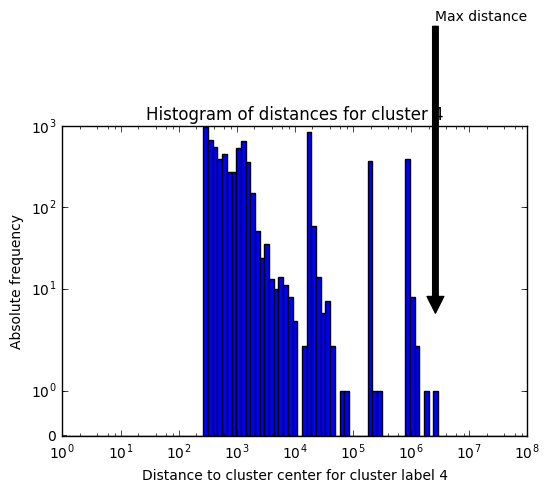

In [11]:
# Plot histogram for distances related to the company with the largest distance
index_for_max = indices_clusterer[0]
cluster_label = clusterer.labels_[index_for_max]
hist((distances[clusterer.labels_ == cluster_label]), bins=np.logspace(0, 8, 100))
max_value = distances[index_for_max]
ax = gca()
ax.set_xscale('log')
ax.set_yscale('symlog')
ax.annotate('Max distance', xy=(max_value, 5), xytext=(max_value, 20000), arrowprops=dict(facecolor='black'))
xlabel('Distance to cluster center for cluster label {}'.format(cluster_label))
ylabel('Absolute frequency')
title('Histogram of distances for cluster {}'.format(cluster_label))
show()

In [12]:
feature_distances_for_all = (dfni - clusterer.cluster_centers_[clusterer.labels_, :]) ** 2

In [13]:
index_of_interest = index_for_max
index_of_interest = df.index.get_loc(56994912)  # SAS Danmark A/S
df.iloc[index_of_interest, :]

antal_penheder                       1
branche_ansvarskode                  0
nyeste_antal_ansatte              1000
nyeste_virksomhedsform    Aktieselskab
reklamebeskyttet                 False
sammensat_status                NORMAL
nyeste_statuskode                 None
stiftelsesaar                     1920
Name: 56994912, dtype: object

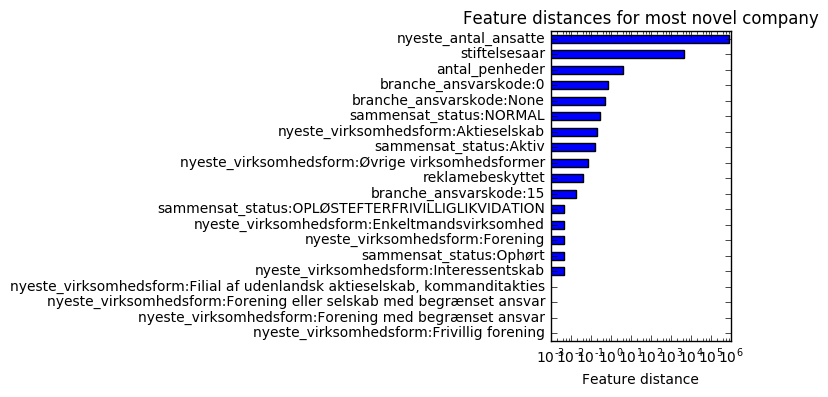

In [14]:
# Bar plot of feature distances for a company
feature_distance = Series(feature_distances_for_all[index_of_interest, :], index=dfn.columns)
feature_distance.sort_values(inplace=True, ascending=False)
feature_distance.iloc[:20][::-1].plot(kind='barh')
ax = gca()
pos = ax.get_position()
pos.x0 = 0.6
ax.set_position(pos)
ax.set_xscale('log')
xlabel('Feature distance')
title('Feature distances for most novel company')
show()

In [15]:
# Write results to an HTML file
filename = expanduser('~/workspace/cvrminer/virksomheder-report.html')
with codecs.open(filename, 'w', encoding='utf-8') as f:
    f.write("""
<html>
  <head>
    <title>Virksomheder report</title>
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
  </head>
  <body>
    <h1>Virksomheder report</h1>
    
""")
    
    f.write("""<h2>Numerical features dataframe summary statistics</h2>""")
    f.write(dfn.describe().T.to_html())
    f.write("""<h2>Novelty from k-means</h2>""")
    f.write(dfn.iloc[indices_clusterer[:50], :].to_html(
            escape=False,
            formatters={'__index__': 
                        lambda idx: '<a href="http://datacvr.virk.dk/data/visenhed?enhedstype=virksomhed&id={}">{}</a>'.format(
                     idx, idx)}))
    f.write("""
  </body>
</html>""")

In [16]:
# Investigate cluster model as a function of number of clusters
inertias = []
for n_clusters in range(1, 50):
    clusterer = MiniBatchKMeans(n_clusters=n_clusters, max_iter=200, max_no_improvement=30, n_init=10)
    clusterer.fit(dfni)
    inertias.append(clusterer.inertia_)

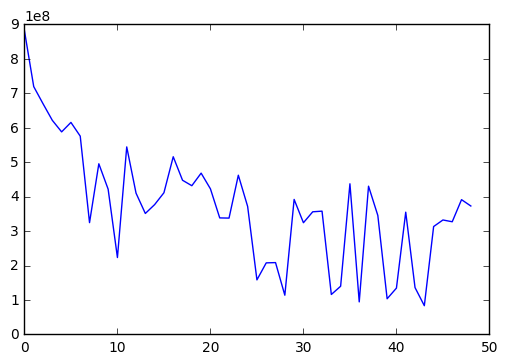

In [17]:
plot(inertias)
show()